In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
def f(x):
    return x*2

In [4]:
np.random.seed(42)
x = np.random.uniform(0,1,10)
x

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [5]:
t = f(x)

In [6]:
t

array([0.74908024, 1.90142861, 1.46398788, 1.19731697, 0.31203728,
       0.31198904, 0.11616722, 1.73235229, 1.20223002, 1.41614516])

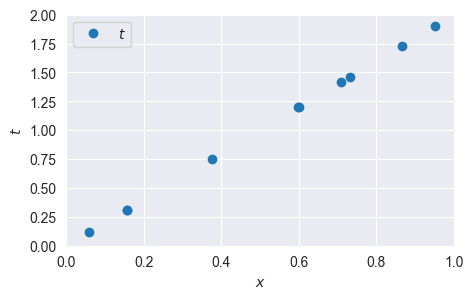

In [7]:
plt.figure(figsize=(5,3))
plt.plot(x,t,'o',label = '$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)
plt.legend()
plt.show()

In [9]:
noise = np.random.normal(0,0.3 , x.shape[0])
t = f(x) + noise
t

array([ 0.60823792,  2.06419663,  1.32496258,  1.05759804,  0.38462596,
       -0.26199503, -0.40130813,  1.56366603,  0.89838069,  1.51041936])

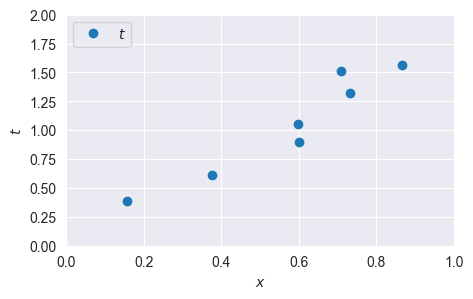

In [10]:
plt.figure(figsize=(5,3))
plt.plot(x,t,'o',label = '$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)
plt.legend()
plt.show()

In [11]:
#Define The loss function()

In [21]:
def loss(pred,t):
    return np.mean((t-pred)**2)
def model(x,w_0):
    return w_0*x

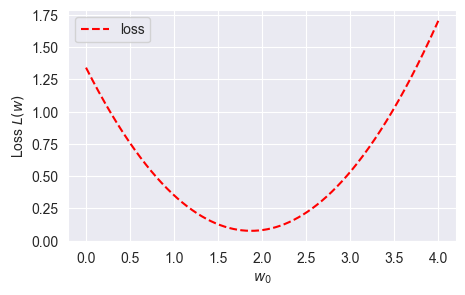

In [24]:
w_s = np.linspace(0,4,1000)
losses = np.array([loss(model(x,w_o),t) for w_o in w_s])
plt.figure(figsize=(5,3))
plt.plot(w_s, losses, 'r--', label='loss')
plt.xlabel('$w_0$')
plt.ylabel('Loss $L(w)$')
plt.legend()
plt.show()

In [26]:
def gradient(w_0,x,t):
    return np.mean(x*2*(model(x,w_0)-t))

In [34]:
w_0 = np.random.rand()
alpha = 0.9 #define the learning rate

nb_of_intergration = 10
w_loss = [(w_0,loss(model(x,w_0),t))]

for i in range(nb_of_intergration):
    gd = gradient(w_0,x,t)
    w_0 = w_0 - gd*alpha
    w_loss.append(((w_0,loss(model(x,w_0),t))))

In [35]:
for i in w_loss:
    print(f'w_0:{i[0]:.4f},loss:{i[1]:.4f}')

w_0:0.7852,loss:0.5033
w_0:1.4915,loss:0.1288
w_0:1.7396,loss:0.0825
w_0:1.8268,loss:0.0768
w_0:1.8575,loss:0.0761
w_0:1.8683,loss:0.0760
w_0:1.8720,loss:0.0760
w_0:1.8734,loss:0.0760
w_0:1.8738,loss:0.0760
w_0:1.8740,loss:0.0760
w_0:1.8741,loss:0.0760


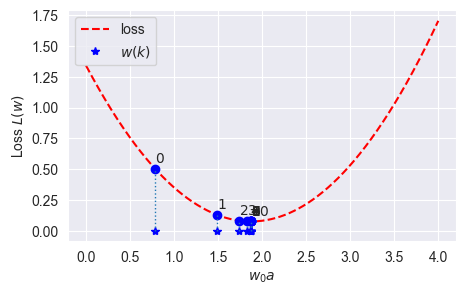

In [36]:
plt.figure(figsize=(5,3))
plt.plot(w_s, losses, 'r--', label='loss')

for i in range(0, len(w_loss)-1):
    w_1, c1 = w_loss[i]
    w_2, c2 = w_loss[i+1]
    plt.plot(w_1, c1, 'bo')
    plt.text(w_1, c1+0.05, f'${i}$')
    plt.plot(w_1, 0, 'b*')
    plt.vlines(x=w_1, ymin=0, ymax=c1, lw=1, ls='dotted' )

plt.plot(w_2, c2, 'bo' )
plt.text(w_2, c2+0.05, f'${i+1}$')
plt.plot(w_2, 0, 'b*', label='$w(k)$')
plt.vlines(x=w_2, ymin=0, ymax=c2, lw=1, ls='dotted')
plt.xlabel('$w_0a$')
plt.ylabel('Loss $L(w)$')
plt.legend()
plt.show()

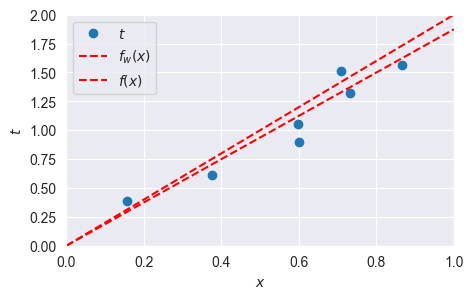

In [43]:
plt.figure(figsize=(5,3))
plt.plot(x,t,'o',label="$t$")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

plt.plot([0,1],[model(0,w_0),model(1,w_0)],'r--',label="$f_w(x)$")
plt.plot([0,1],[f(0),f(1)],'r--',label = "$f(x)$")
plt.legend()
plt.show()